# Lab 2 - 13132911

Note: We weren't informed of the details of the dataset and what the columns represent until after I had finished, so I have misinterpreted some of the attributes and thus the analysis. However, we were told this didn't matter and the point of the exercise was to use the tools and techniques and analyse what we see. Hopefully this is ok!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration

In [2]:
df = pd.read_csv('./bank.csv')

In [3]:
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [7]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [8]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [9]:
df[df.default=='yes']

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
32,34,blue-collar,single,secondary,yes,-60,0.560304,-0.069991,no,no,cellular,3,apr,84,1,332,1,failure,no
185,48,blue-collar,divorced,secondary,yes,-535,0.002274,0.997458,yes,no,cellular,2,feb,115,2,187,2,failure,no
318,54,retired,divorced,secondary,yes,-200,2.170316,-0.694191,no,yes,cellular,4,feb,71,1,243,1,failure,no
450,57,admin.,divorced,secondary,yes,-435,0.776125,-1.021513,yes,yes,cellular,6,feb,89,5,273,2,failure,no
499,31,management,single,secondary,yes,0,0.850572,0.153154,no,no,cellular,11,feb,112,4,85,2,failure,no
520,33,blue-collar,married,secondary,yes,-354,1.774287,-0.593534,yes,yes,cellular,28,jan,104,1,245,2,failure,no
597,27,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
645,26,management,divorced,tertiary,yes,-402,0.133795,1.625656,no,yes,cellular,29,jan,66,2,262,2,failure,no
674,47,management,married,tertiary,yes,-337,-0.086076,0.520419,no,yes,cellular,29,jan,243,4,161,2,failure,no
799,33,blue-collar,married,primary,yes,-744,0.410441,0.092157,yes,no,NaN,8,may,206,1,-1,0,NaN,no


## EDA

### Numerical

Text(0, 0.5, 'Count')

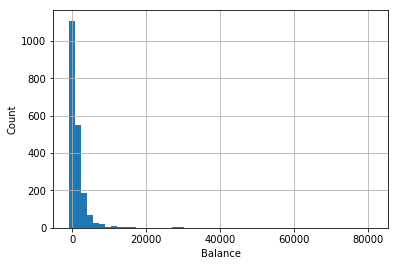

In [10]:
df['balance'].hist(bins=50)
plt.xlabel('Balance')
plt.ylabel('Count')

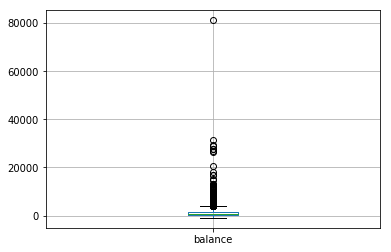

In [11]:
df.boxplot(column='balance')

Text(0.5, 0.98, '')

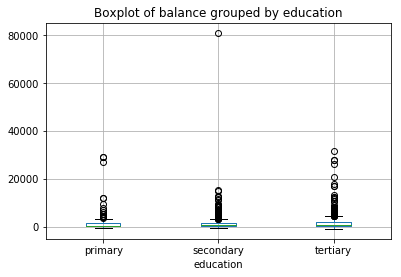

In [12]:
df.boxplot(column='balance', by = 'education')
plt.title('Boxplot of balance grouped by education')
plt.suptitle('')

Text(0, 0.5, 'Count')

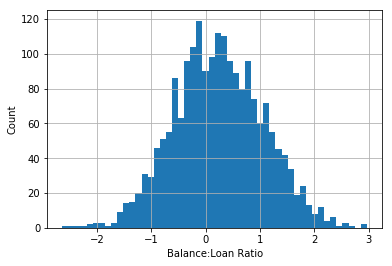

In [13]:
df['ratio_bal_ln'].hist(bins=50)
plt.xlabel('Balance:Loan Ratio')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

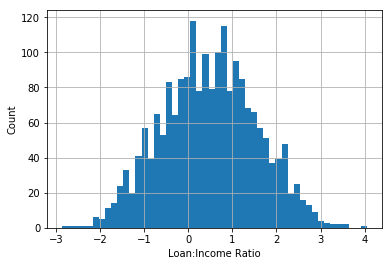

In [14]:
df['ratio_ln_inc'].hist(bins=50)
plt.xlabel('Loan:Income Ratio')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

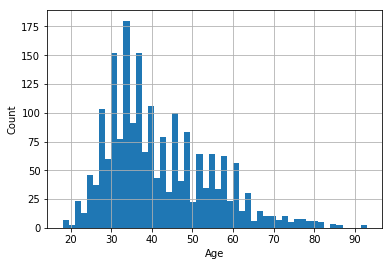

In [15]:
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')

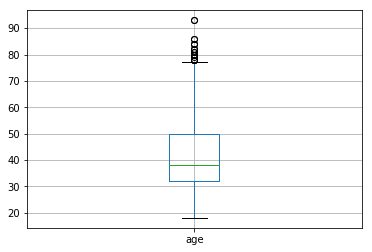

In [16]:
df.boxplot(column = 'age')

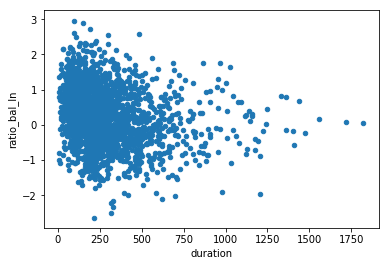

In [17]:
df.plot.scatter(x='duration', y='ratio_bal_ln')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


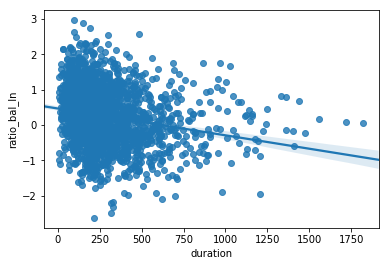

In [18]:
sns.regplot(x='duration', y='ratio_bal_ln', data=df)

The longer the duration of the loan, the worse the applicants' balance to loan ratio becomes. This makes some sense, since if it's a shorter term loan you should havea higher balance sooner, to pay it off. If the loan is longer-term, you have more time to build up your balance.

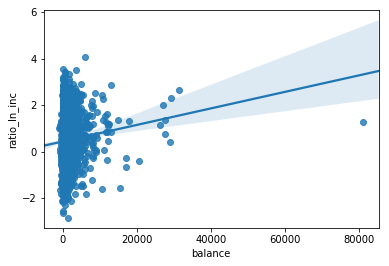

In [19]:
sns.regplot(x='balance', y='ratio_ln_inc', data=df)

The higher the applicant's balance, the larger the loan is, relative to their income. This is somewhat surprising, but is maybe the result of higher income people being able to take out large loans for cars, houses, etc. Since they have a higher income, they are more likely to be accepted for these loans.

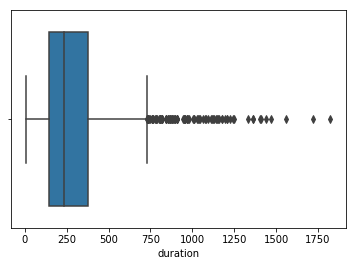

In [20]:
sns.boxplot(x=df.duration)

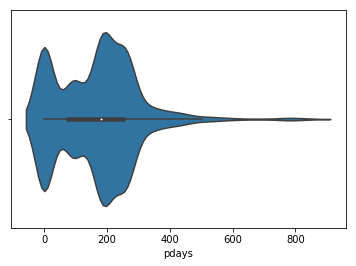

In [21]:
sns.violinplot(x=df.pdays)

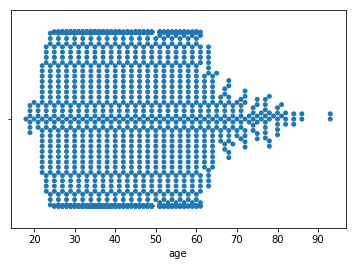

In [22]:
sns.swarmplot(x=df.age)

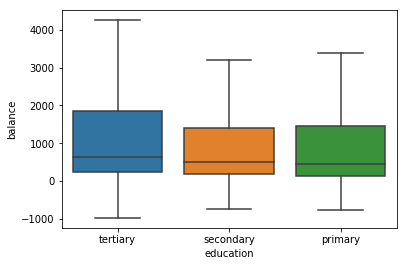

In [23]:
sns.boxplot(x=df.education, y=df.balance, showfliers=False)

As would be expected, tertiary-qualified applicants have higher average balance, but not much more. In fact, secondary-eduacted applicants perform slightly worse than primary-educated ones.

### Categorical

In [24]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [25]:
df['job'].value_counts(ascending=True)

housemaid         35
entrepreneur      45
self-employed     64
unemployed        69
student           96
retired          162
services         165
admin.           247
blue-collar      298
technician       348
management       461
Name: job, dtype: int64

In [26]:
housing_table = df['housing'].value_counts(ascending=True)
print(housing_table)

yes     963
no     1037
Name: housing, dtype: int64


In [27]:
pivot_table = df.pivot_table(values='ratio_bal_ln',
                       index=['housing']) 
print(pivot_table)

         ratio_bal_ln
housing              
no           0.031383
yes          0.468699


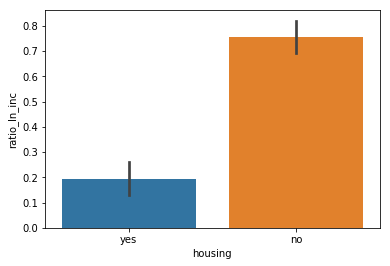

In [28]:
sns.barplot(x='housing', y='ratio_ln_inc', data=df)

There is a roughly equal amount of loan applicants with and without houses (above), but when we look at the ratio of those loans to the applicants' incomes, we see that those without houses are applying for much larger loans relative to their income. Presumably those without houses have lower incomes and are younger

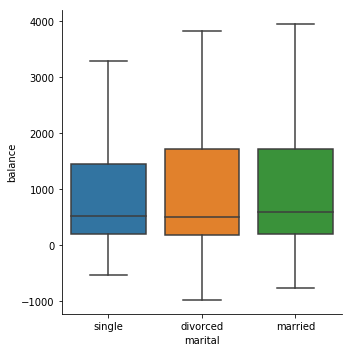

In [29]:
sns.catplot(x='marital', y='balance', kind='box', showfliers=False, data=df)

There is no significant variance in balance between marital statuses, apart from slightly lower values for single individuals. This is probably more correlated with age than marital status.

Text(0, 0.5, 'Count')

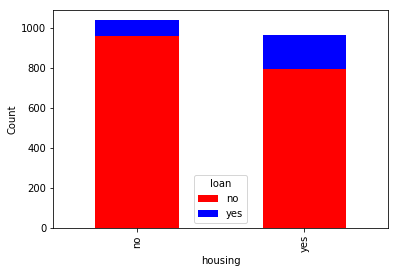

In [30]:
stacked_chart = pd.crosstab(df['housing'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Count')

We see that applicants with housing are approved for loans at a higher rate than those without, which makes sense since they have a large asset as collateral. They also likely have higher incomes.

Text(0, 0.5, 'Count')

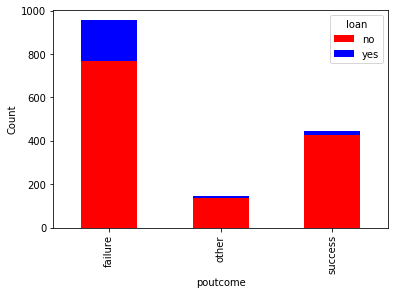

In [31]:
stacked_chart = pd.crosstab(df['poutcome'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Count')

Interestingly, those who have failed at loans before (poutcome), are actually more likely to be approved for a loan now. Maybe this is because having been rejected means they apply for more loans, and are likely to be accepted eventually.